- 필요한 라이브러리 import

In [62]:
import os
import pickle
import sys
import urllib.request
import requests
import MeCab#윈도우 mecab 불러오기
import nltk
import json
import pandas as pd
import requests
import re #추가
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from urllib.parse import quote
from pandas import Series
from sklearn.cluster import KMeans

#윈도우에서 Mecab생성
mecab=MeCab.Tagger()

- 관련 리스트 사전 생성
- 국민 여가활동 설문지에서 주어진 여가 활동 항목들을 세분화시켜 총 211개의 취미 리스트 생성

In [63]:
big_cat=[#큰 카테고리 검색용
    '문화예술관람활동','문화예술참여활동','스포츠관람활동',
    '스포츠참여활동','관광활동','취미/오락활동',
    '휴식활동','사회/기타활동'
]
leisure_dict_search=[#여가 딕셔너리 검색어 생성(검색/출력용)
    #문화예술관람활동
    ['미술_전시회_관람','사진_전시회_관람','건축_전시회_관람','디자인_전시회_관람',
    '박물관_관람',
    '클래식_음악_연주회_관람','오페라_음악_연주회_관람',
    '국악_전통공연_관람','민속놀이_공연_관람',
    '연극공연_관람','뮤지컬_관람',
    '무용_공연_관람',
    '영화_관람',
    '쇼_공연_관람','콘서트_공연_관람','마술_쇼_공연_관람'],
    #문화예술참여활동
    ['문학_행사_참여',
    '글짓기_참여' ,'독서_토론_참여',
    '그림_활동_참여','서예_활동_참여','조각_활동_참여','디자인_활동_참여','도예_활동_참여','만화_활동_참여',
    '악기_연주_참여','노래교실 참여',
    '춤_참여','무용_참여','발레_참여','한국무용_참여','현대무용_참여','방송댄스_참여','스트릿댄스_참여','비보잉_참여',
    '사진_촬영',
    '사물놀이_참여','줄타기_참여'],
    #스포츠관람활동
    ['축구_경기장_방문_관람' ,'야구_경기장_방문_관람','농구_경기장_방문_관람','배구_경기장_방문_관람',
    '축구_경기_티비_관람','야구_경기_티비_관람','농구_경기_티비_관람','배구_경기_티비_관람',
    '태권도_경기_관람','유도_경기_관람','합기도_경기_관람','검도_경기_관람','권투_경기_관람',
    'e-스포츠_경기_관람'],
    #스포츠참여활동
    ['농구_참가','배구_참가','야구_참가','축구_참가','족구_참여',
    '테니스_참여','스쿼시_참여',
    '당구_참여','포켓볼_참여',
    '볼링_참여','탁구_참여',
    '골프_참여',
    '수영_참여' ,
    '윈드서핑_참여','수상스키_참여','스킨스쿠버다이빙_참여','래프팅_참여','요트_참여',
    '스노보드_참여','스키_참여',
    '아이스스케이트_참여','아이스하키_참여',
    '헬스_참여','보디빌딩_참여','에어로빅_참여',
    '요가_참여','필라테스_참여','태보_운동_참여',
    '배드민턴_참여','줄넘기_참여','맨손_체조_참여','스트레칭_참여','훌라후프_참여',
    '육상_참여','조깅_참여','빠르게_걷기_참여',
    '태권도_참여','유도_경기_참가','합기도_참여','검도_참여','권투_참여',
    '탱고_참여','왈츠_댄스_참여','자이브_참여','맘보_참여','폴카_댄스_참여','차차차_댄스_참여',
    '사이클링_참여','자전거_참여',
    '인라인_스케이트_참여',
    '승마_참여','암벽등반_참여','철인삼종경기_참여','서바이벌_참여'],
    #관광활동
    ['문화유적_방문',
    '자연명승_방문','풍경_관람',
    '삼림욕',
    '국내캠핑',
    '해외여행',
    '소풍','야유회',
    '온천','해수욕',
    '유람선_타기',
    '테마파크_가기','놀이공원_가기','동물원_가기','식물원_가기',
    '지역축제_참가',
    '자동차_드라이브'],
    #취미오락활동
    ['콜렉션','스크랩북',
    '십자수','비즈공예', 'DIY','꽃꽂이',
    '요리하기','다도',
    '반려동물_키우기',
    '노래방_가기',
    '집_인테리어','자동차_인테리어',
    '등산',
    '낚시',
    '홈페이지_관리','블로그_관리',
    '인터넷_검색','1인_미디어_제작','SNS',
    '온라인_게임','모바일_게임','콘솔_게임',
    '보드게임','퍼즐','큐브_맞추기',
    '바둑','장기','체스',
    '경마','경륜','카드놀이','고스톱','마작','복권구입',
    '쇼핑','외식',
    '음주',
    '독서','웹소설',
    '만화보기','웹툰보기',
    '피부관리','헤어관리','네일아트','마사지','성형',
    '어학_공부','기술_공부','자격증_공부',
    '방탈출_카페_체험','VR_카페_체험','낚시카페_체험',
    '원예','화단_가꾸기'],
    #휴식활동
    ['산책','걷기',
    '목욕','사우나','찜질방',
    '낮잠',
    'TV_시청',
    '모바일_컨텐츠','동영상_시청',
    '라디오_청취','팟캐스트_청취',
    '음악_감상',
    '신문_보기','잡지_보기',
    '아무것도_안_하기'],
    #사회 및 기타활동
    ['사회봉사',
    '종교활동',
    '클럽_가기','나이트_가기','디스코_가기','캬바레_가기',
    '가족_방문','친지_방문',
    '잡담','통화하기','문자보내기',
    '계모임','동창회','사교파티',
    '친구_만남','이성교제','미팅','소개팅',
    '동호회_모임']
]

## 사용자 입장에서 확인하려면 6번 항목부터 열람 요망

# 1. 네이버 API를 이용하여 블로그 url 크롤링

In [ ]:
client_id = ""
client_secret = ""
#API를 사용한 크롤링 함수 작성
def call(keyword, start):
    encText = urllib.parse.quote(keyword)
    url = "https://openapi.naver.com/v1/search/blog?query=" + encText+"&sort=sim&display=100&start="+str(start) # json 결과
    result=requests.get(url=url, headers={"X-Naver-Client-Id":client_id,'X-Naver-Client-Secret':client_secret})
    print(result)
    return result.json()

def results(keyword):
    list_=[]
    for num in range(0,10):
        list_=list_+call(keyword,num*110+1)['items']
    return list_

In [ ]:
for row in leisure_dict_search:
    for obj in row:
        list_=[]
        result=results(obj)
        list_=list_+result

        file=open('./Leisures/Raw_Data/'+obj+'.json','w+')#json 파일을 받기에 json을 csv 파일로 변환하는 작업 포함
        file.write(json.dumps(list_))
        df=pd.read_json('./Leisures/Raw_Data/'+obj+'.json')
        df.to_csv('./Leisures/CSV_Data/crawling_'+obj+'.csv',encoding='utf-8-sig',index=False)

- 결과물 : 각 취미별 블로그 url 정보가 담겨있는 json+csv 파일 211개
- csv 파일 내에 description이 본문 전체 정보가 아닌 요약 정보이기 때문에 일일이 검색하면서 본문을 찾는 작업이 필요했다.

# 2. url을 이용한 실제 본문 크롤링

- iframe내의 본문 정보를 긁어내기 위해 iframe 관련 함수, 텍스트를 잘라내는 함수 2개를 작성

In [ ]:
def delete_iframe(url):
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36"}
    res = requests.get(url, headers=headers)
    if res.status_code!=200:
        print("iframe slicing에 실패하였습니다. 다음 페이지로 넘어갑니다.")
        return
    soup = BeautifulSoup(res.text, "lxml") 

    src_url = "https://blog.naver.com/" + soup.iframe["src"]#네이버 블로그인 경우에만 리턴
    
    return src_url

In [ ]:
# 본문 스크래핑
def text_scraping(url):
    if url is None:
        print("scraping에 실패하였습니다. 다음 페이지로 넘어갑니다.")
        return ""
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36"}
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, "lxml") 

    if soup.find("div", attrs={"class":"se-main-container"}):
        text = soup.find("div", attrs={"class":"se-main-container"}).get_text()
        text = text.replace("\n","") #공백 제거
        return text

    elif soup.find("div", attrs={"id":"postViewArea"}):
        text = soup.find("div", attrs={"id":"postViewArea"}).get_text()
        text = text.replace("\n","") 
        return text
    else:
        return "네이버 블로그는 맞지만, 확인불가"

In [ ]:
#실제 블로그 크롤링 코드
for i1,row in enumerate(leisure_dict_search):
    for i2,obj in enumerate(row):
        data=pd.read_csv('./Leisures/CSV_Data/crawling_'+obj+'.csv')
        link_list=list(data['link'])
        text_container=""
        for index,post in enumerate(link_list):
            print(obj+"의 "+str(index)+"번째 블로그 크롤링 진행")
            blog_p = re.compile("blog.naver.com")
            blog_m = blog_p.search(post)
            if blog_m:
                blog_text = text_scraping(delete_iframe(post))
                text_container=text_container+blog_text
                print("해당 블로그 글자수 : "+str(len(blog_text)))
                print("누적 글자수 : "+str(len(text_container)))
        f = open("./Leisures/Text/"+obj+".txt", 'w',encoding='UTF8')
        f.write(text_container)
        f.close()

- 결과물 : 211개의 취미별로 1000개의 블로그 본문만을 합쳐놓은 txt 데이터 211개
- 검색으로 모호한 결과가 나오는 일부 검색어에 대해서 재검색 후 적용
  - 장기 -> 장기게임
  - 경륜 -> 하나님/교회 키워드를 제외하고 검색
  - 태보 -> 나라 키워드를 제외하고 검색
  - TV -> 영어는 검색되지 않기 때문에 티비로 변경
  - 왈츠/차차차/폴카 -> 왈츠 댄스, 차차차 댄스, 폴카 댄스
  - 유도 참가 -> 유도 경기 참가

# 3. 텍스트 마이닝

- 주요 단어를 추출하기 전, 일반적으로 쉽게 나올 수 있는 대표 불용어 100개 사전 제거

In [57]:
stop_words=[
    '이','있','하','것','들','그','되','이','보','않','없','나','같','없','가','때','들','주','등','같',
    '년','한','지','오','말','일','나오','그렇','위하','때문','그것','두','알','그러나','받','못하','요즘',
    '그런','또','더','그리고','좋','중','따르','가지','씨','시키','살','될','안','데','내','경우','다시','그녀',
    '이런','앞','나','된','잘','놓','위','위해','했','받','해','대해','해서','통해','후기','사','점','끝',
    '이번','큰','와서','동안','지금','오늘','코로나','네이버','위한','넣','크','맞','날','할','속','남','그때',
    '한다','작','적','많','왔','해도','된다','전','이르','후'
]

- mecab 라이브러리의 특성을 활용하여 정규표현식+관련 단어만 추출해내는 함수 작성
- 기본적으로 **불용어 제외/일반명사, 고유명사, 동사, 형용사, 어근만을 추출**하는 프로그램을 작성하였다.

In [54]:
def mecab_extract(text,obj):
    nouns = []
    temp=[]
    obj_list=obj.split("_")
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile(".*\t[A-Z]+") 
    
    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    for token in mecab.parse(text).splitlines()[:-1]:
        temptuple=pattern.match(token)
        if(temptuple!=None):#몇 구문에서 공백도 처리하는 문제 발생. 파이썬스러운 구문으로 하기에는 문제가 좀 있음
            temp.append(tuple(temptuple.group(0).split("\t")))
    
    # 추출한 token중에 일반명사, 고유명사, 동사, 형용사, 어근 추출
    for token in temp:
        if token[0] in stop_words or token[0] in obj_list: #불용어 100개 제거
            continue
        if token[1] == "NNG" or token[1] == "NNP" or token[1] == "VV" or token[1] == "VA" or token[1] == "XR":
            nouns.append(token[0])
        
    return nouns

- 프로그램을 사용할 때마다 일일이 mecab 라이브러리를 이용하면 성능 저하가 일어나는 것을 확인함
- 이에 단어 분석을 한 결과를 pickle 라이브러리를 이용하여 바이너리 형태로 저장하기로 함
- 기본적으로 pkl 파일에 가장 빈도가 높은 단어 500개의 종류와 그 빈도가 저장되어 있음

In [ ]:
#pickle 파일 저장
for row in leisure_dict_search:
    for obj in row:
        fread=open("./Leisures/Text/"+obj+".txt", 'r',encoding='UTF8')
        templist=fread.read()
        tempresult=mecab_extract(templist,obj)
        print(obj+"추출 완료")
        text=nltk.Text(tempresult,name=obj)
        commons=text.vocab().most_common(500)
        f = open("./Leisures/Description_Data_New/"+obj+".pkl", 'wb')
        pickle.dump(commons,f)
        f.close()

- 결과물 : 취미별로 상위 500개의 단어와 그 빈도가 저장되어 있는 pkl 파일 211개

# 4. 온/오프라인 판별(K-Means Clustering)

- 온/오프라인 판별을 위한 단어 결정을 위해 다음과 같은 단계를 통해 결정함

1. **'비대면 취미/온라인 취미'와 '오프라인 취미/야외 취미'를 검색했을 때 나오는 키워드를 저장**
  - 이때의 저장 방식은 지금까지의 텍스트 마이닝 작업과 동일
  
  
2. 도출된 온/오프라인 단어별로 **상호간 존재하지 않는 단어를 서로의 키워드**로 지정


3. 이외의 단어들을 찾아내기 위해 **온/오프라인 활동이 확실한 취미에 대해서 교차 확인**하는 방법으로 추가 키워드를 찾아냄
  - 온라인 : 웹툰, 블로그 관리, SNS 등 / 오프라인 : 등산, 당구 참여, 풍경 관람 등
  

- 온라인 활동을 오프라인 활동으로 인식하는 오류보다(2종 오류), **오프라인 활동을 온라인 활동으로 인식하는 오류**(1종 오류)를 더 많이 잡아내기 위해 오프라인 키워드를 더 입력시킴


- 결과적으로 **온라인 키워드 50개, 오프라인 키워드 60개가 도출됨**

In [64]:
online_keywords=['온라인', '혼자', '집', '통화', '유튜브','툰','소설','읽','문자','만들','관리','안정','신규',
                 '채널', '휴대폰', '블로그', '잠', '티비', '관람','화면','영상','개인','명상','업데이트','보상',
                '웹', '사이트', '간단', '홈', '중계', '시청','비대', '전화','미디어','쉬','간단','캐릭터','콘텐츠',
                 '문자', '발송', '인터넷', '청취','셀프','페이스북','그램','팟캐스트','모바일','손','유저','스킬']
offline_keywords=['오프라인', '공간', '곳', '길', '입장', '방문', '룸','호텔','도착','경주','건축','관람','방','층','타','들어가','레슨',
                 '분위기', '여행', '관광', '지역', '시설', '출입', '모임','사람','느낌','전시','공연','데이트','훈련',
                 '이용', '체육관', '공원', '풍경', '가족', '스포츠', '산','메이트','외식','테마','전시회','주민','선수','팀','경기',
                  '수술','캠프','직관','관람객','예약','만나','코치','조','부','무대','걷','경기','대회','춤','사람']
print(len(online_keywords), len(offline_keywords))

50 60


- 온/오프라인별 주요 단어 추출을 위한 검색어 비교

In [65]:
hobbysonoff=[]
fread=open("./Leisures/Text/비대면_취미.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_extract(templist, "비대면_취미")
text=nltk.Text(tempresult,name='비대면_취미')
hobbysonoff.append(text.vocab().most_common(500))

fread=open("./Leisures/Text/온라인_취미.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_extract(templist,"온라인_취미")
text=nltk.Text(tempresult,name='온라인_취미')
hobbysonoff.append(text.vocab().most_common(500))

fread=open("./Leisures/Text/오프라인_취미.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_extract(templist,"오프라인_취미")
text=nltk.Text(tempresult,name='오프라인_취미')
hobbysonoff.append(text.vocab().most_common(500))

fread=open("./Leisures/Text/야외_취미.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_extract(templist,"야외_취미")
text=nltk.Text(tempresult,name='야외_취미')
hobbysonoff.append(text.vocab().most_common(500))

In [66]:
hobbylist=[]
for row in hobbysonoff:
    hobby=[]
    for obj in row:
        hobby.append(obj[0])
    hobbylist.append(hobby)

In [67]:
onlinelist=hobbylist[0]+hobbylist[1]
offlinelist=hobbylist[2]+hobbylist[3]
online=[]#온라인 키워드에만 있는 단어가 이곳으로 저장됨
offline=[]#오프라인 키워드에만 있는 단어가 이곳으로 저장됨
for obj in onlinelist:
    if obj not in offlinelist:
        online.append(obj)
for obj in offlinelist:
    if obj not in onlinelist:
        offline.append(obj)
print(online, offline)

['비대', '대면', '택트', '언', '단체', '화상', '보컬', '도서관', '출강', '줌', '진주', '사업', '봉사', '원예', '청소년', '오프라인', '목공', '지갑', '룻', '소통', '기술', '직업', '복지', '실시간', '마라톤', '도자기', '벨', '우드', '커스', '관', '카빙', '행사', '시스템', '개설', '연기', '투자', '심리', '초등', '도장', '어린이', '바느질', '개발', '검사', '대학교', '맞춤', '계획', '냅킨', '업체', '라이브', '아동', '농장', '자료', '계좌', '패턴', '페이퍼', '여성', '피', '기획', '협회', '드립니다', '꿈', '특강', '연락', '입시', '스마트폰', '재단', '속옷', '화면', '바랍니다', '어르신', '문자', '카톡', '수제', '이론', '도서', '대학', '기존', '마감', '인증', '시국', '전달', '설치', '테라', '해외', '죽공예', '확산', '진로', '조사', '경제', '카카오톡', '모두', '수다', '능력', '시설', '주식', '편집', '부천', '두기', '크리스마스', '대', '연구', '회의', '안정', '트렌드', '실습', '방향', '최대', '익숙', '비스킷', '오프라인', '마이비', '스킷', '프랑스', '비대', '강', '화면', '울산', '도안', '티', '보정', '굿', '리스', '코스터', '민화', '기획', '룸', '코드', '톡', '뿌듯', '무제한', '들으면서', '계발', '퀄리티', '경제', '짧', '프로젝트', '순', '줌', '소셜', '아이디', '펀치', '포인트', '피드백', '방구석', '익숙', '나만', '틀', '레진', '드립니다', '어스', '챙겨', '채색', '엮', '니들', '결과물', '캘', '즐겨', '카테고리', '나중', '브', '동물', '이것저것

- 각 여가 활동마다의 오프라인 단어 빈도, 온라인 단어 빈도를 알아보자

In [65]:
onoff=[]
for row in leisure_dict_search:
    for obj in row:
        fread=open("./Leisures/Description_Data_New/"+obj+".pkl", 'rb')
        templist=pickle.load(fread)
        offlinecnt=0
        onlinecnt=0
        for cnt in templist:
            if cnt[0] in offline_keywords:
                offlinecnt+=cnt[1]
            elif cnt[0] in online_keywords:
                onlinecnt+=cnt[1]
        onoff.append([offlinecnt,onlinecnt])
        fread.close()
onoff

[[12317, 2705],
 [14367, 3312],
 [12002, 3515],
 [14604, 3838],
 [14879, 2887],
 [14693, 1959],
 [16374, 1986],
 [20265, 2977],
 [14022, 3066],
 [14118, 2290],
 [11801, 2232],
 [7906, 2691],
 [4768, 2300],
 [8827, 1844],
 [7353, 2548],
 [5140, 2111],
 [7664, 4295],
 [4179, 1912],
 [6797, 6814],
 [7258, 4458],
 [10929, 3314],
 [11636, 4656],
 [9854, 5715],
 [11334, 4938],
 [7071, 6960],
 [10225, 3936],
 [2732, 969],
 [9335, 2826],
 [10014, 2125],
 [5757, 2133],
 [13524, 2660],
 [12572, 2364],
 [6012, 2977],
 [10473, 2307],
 [16619, 3182],
 [9798, 3235],
 [11266, 2406],
 [11202, 2591],
 [25409, 2693],
 [20479, 2791],
 [31737, 3575],
 [46574, 6096],
 [13173, 4282],
 [11675, 4134],
 [21993, 9494],
 [14994, 7876],
 [19091, 2416],
 [21145, 3623],
 [61251, 19637],
 [52984, 10946],
 [22096, 3950],
 [26033, 6231],
 [16358, 1426],
 [21348, 1714],
 [17719, 1198],
 [13296, 932],
 [12992, 1187],
 [13584, 1862],
 [15974, 3119],
 [13561, 1700],
 [15852, 3476],
 [6347, 1492],
 [13732, 1751],
 [10148, 

- 데이터가 많은 값에 대해서 rescaling 진행
  - 각 좌표의 최대값을 20000으로 고정

In [66]:
for obj in onoff:
    if obj[0]>=20000:
        ratio=obj[0]/20000
        obj[0]=obj[0]/ratio
        obj[1]=obj[1]/ratio
    if obj[1]>=20000:
        ratio=obj[1]/20000
        obj[0]=obj[0]/ratio
        obj[1]=obj[1]/ratio

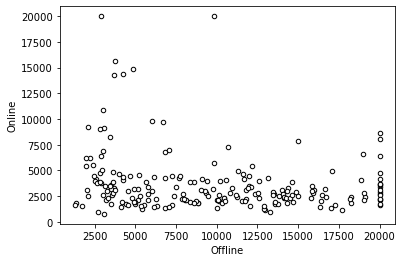

In [67]:
#데이터프레임 생성 후 좌표 출력
a=np.array(onoff)
sampledf=pd.DataFrame(data=a[:,0],columns=['Offline'])
sampledf['Online']=a[:,1]
plt.scatter(
   a[:, 0], a[:, 1],
   c='white', marker='o',
   edgecolor='black', s=20
)
plt.xlabel("Offline")
plt.ylabel("Online")
plt.show()

- 이렇게 생성된 리스트를 바탕으로 온/오프라인 여부 비교
- 온/오프라인의 군집화 형성을 위해 K-Means Clustering 진행
  - 최적의 K값을 도출해내기 위해 Elbow Method를 먼저 진행해보기로 함
- 여기서의 x좌표 : offline 단어 빈도 수, y좌표 : online 단어 빈도 수임

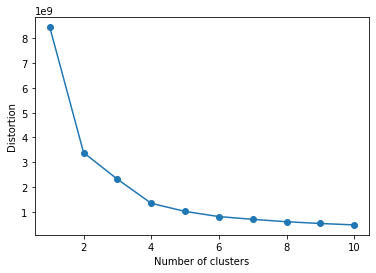

In [68]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(a)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

- 분산이 4에서 완만해지는 것을 확인할 수 있다.
- 따라서 K의 값을 4로 지정하고 Clustering 진행

In [81]:
km=KMeans(n_clusters=4,n_jobs=5,random_state=1)
km.fit(onoff)
y_km=km.fit_predict(a)

C:\Users\mitha\anaconda3\envs\mining\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\mitha\anaconda3\envs\mining\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [82]:
y_km

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1,
       1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 3, 3, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2,
       0, 1, 0, 3, 3, 0, 0, 1, 0, 0, 0, 1, 0])

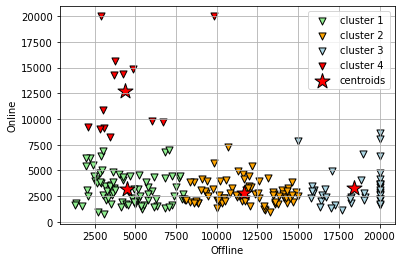

In [83]:
plt.scatter(
    a[y_km == 0, 0], a[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    a[y_km == 1, 0], a[y_km == 1, 1],
    s=50, c='orange',
    marker='v', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    a[y_km == 2, 0], a[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    a[y_km == 3, 0], a[y_km == 3, 1],
    s=50, c='red',
    marker='v', edgecolor='black',
    label='cluster 4'
)



# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel("Offline")
plt.ylabel("Online")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

- cluster 1 : 온/오프라인 데이터가 고르게 분포되어 있는 경우 - **하이브리드로 판단**
- cluster 2,3 : 오프라인 단어 빈도 수가 더 많이 분포되어 있는 경우 - **오프라인으로 판단**
- cluster 4 : 온라인 단어 빈도 수가 더 많이 분포되어 있는 경우 - **온라인으로 판단**

- 결과 또한 pickle 파일로 저장하도록 함

In [12]:
f = open("./Leisures/Description_Data_New/onoffdatas.pkl", 'wb')
pickle.dump(y_km,f)
f.close()

# 5. TF-IDF 시행

- 여가 활동별 주요단어 250개를 이용하여 상호간 TF-IDF 시행
- sklearn을 사용하기 위해 단어+빈도로 저장되어 있는 튜플을 문자열로 재구성 후 상관도 분석

In [ ]:
reconfig=[]
for row in leisure_dict_search:
    for obj in row:
        fread=open("./Leisures/Description_Data_New/"+obj+".pkl", 'rb')
        templist=pickle.load(fread)
        fread.close()
        templist=templist[:250]#상위단어 250개만 사용함
        tempstring=""
        for index in templist:
            for i in range(index[1]):
                tempstring=tempstring+index[0]+" " 
        reconfig.append(tempstring)

- 결과물 : reconfig 안에 취미별로 재구성된 문자열이 저장되어있음

In [ ]:
#tf-idf
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(reconfig)
doc_nouns_similarities = (tfidf_matrix * tfidf_matrix.T)

print(doc_nouns_similarities.toarray())

In [ ]:
#빠른 불러오기를 위해 상관도를 pickle 파일로 저장함
f = open("./Leisures/Description_Data_New/correlation.pkl", 'wb')
pickle.dump(doc_nouns_similarities.toarray(),f)
f.close()#상관도 저장

# 6. 가중치 부여

- 사전에 입력해놓은 평일/휴일별 여가활동 유형을 Dataframe으로 저장

In [16]:
weekday=pd.read_csv('./Leisures/CSV_Data/평일_여가활동_유형.csv',encoding='CP949')
weekend=pd.read_csv('./Leisures/CSV_Data/휴일_여가활동_유형.csv',encoding='CP949')
weekday=weekday.set_index('구분')
weekend=weekend.set_index('구분')

In [17]:
#지금껏 구한 상관도 불러오기
fread=open("./Leisures/Description_Data_New/correlation.pkl", 'rb')
colarray=pickle.load(fread)

#데이터프레임 제작을 위한 컬럼 생성
columns=[[],[]]
for index,row in enumerate(leisure_dict_search):
    for obj in row:
        columns[0].append(big_cat[index])
        columns[1].append(obj)
        
#상관도+컬럼 기반으로 데이터프레임 생성
correlation=pd.DataFrame(colarray,columns=columns,index=columns)

#올바른 값 도출을 위해 각 대각값을 0으로 변경
for index,row in enumerate(leisure_dict_search):
    for obj in row:
        correlation[big_cat[index],obj].loc[big_cat[index],obj]=0 #각 대각값을 0으로 변경

- 결과물 : 각 취미에 대한 상관도가 들어있는 DataFrame. 이때의 각 대각값은 0으로 세팅되어있음

### 가중치 산정 방식
  - 사용자에게 최소 1개, 최대 3개의 여가 활동 + 성별 + 연령대 + 주말/휴일 여부를 물어본다.
  - 각 여가 활동별로 **상위 5개 상관도에 1.5, 1.4, 1.3, 1.2, 1.1의 가중치**를 부여
  - 해당되는 주말/휴일 그래프 중 성별별 활동 카테고리에 다음을 부여
    - **1-2등 활동에 1.2 가중치, 3-4등 활동에 1.1 가중치, 그 외의 등수 중 50%미만인 활동은 0.9**를 부여
  - 해당되는 주말/휴일 그래프 중 연령별 활동 카테고리에 다음을 부여
    - **1-2등 활동에 1.2 가중치, 3-4등 활동에 1.1 가중치, 그 외의 등수 중 50%미만인 활동은 0.9**를 부여
  - 만들어진 상관도 표를 통해 **온라인 별, 오프라인 별, 온/오프라인 별, 여가유형별 상위 활동을 출력**한다.

In [18]:
def weight_cal(correlation, list_, df):
    for key,value in enumerate(list_):
        weight=1
        if key<2:
            weight=1.2
        elif key<4:
            weight=1.1
        elif df[value]<50:
            weight=0.9
        correlation[value]=correlation[value].apply(lambda x:x*weight)

def week_type(week):#1이 주말, 2가 평일. 데이터프레임 반환
    if week=="1" or week=="주말":
        return weekend
    elif week=="2" or week=="평일":
        return weekday
    return False
        
def sex_type(correlation, sex, week):
    list_=[]
    if sex=="1" or sex=="남성":#남성을 입력받음
        sexdf=week.loc['남성'].sort_values(ascending=False)
    elif sex=="2" or sex=="여성":#여성을 입력받음
        sexdf=week.loc['여성'].sort_values(ascending=False)
    elif sex=="3" or sex=="패스":#입력을 원하지 않음
        return 
    else: #잘못된 값
        return False
    list_=list(sexdf.index)
    weight_cal(correlation, list_, sexdf)
        
def age_type(correlation, age, week):
    list_=[]
    if age=="1" or age=='10대':
        agedf=week.loc['15-19세'].sort_values(ascending=False)
    elif age=="2" or age=='20대':
        agedf=week.loc['20대'].sort_values(ascending=False)
    elif age=="3" or age=='30대':
        agedf=week.loc['30대'].sort_values(ascending=False)
    elif age=="4" or age=='40대':
        agedf=week.loc['40대'].sort_values(ascending=False)
    elif age=="5" or age=='50대':
        agedf=week.loc['50대'].sort_values(ascending=False)
    elif age=="6" or age=='60대':
        agedf=week.loc['60대'].sort_values(ascending=False)
    elif age=="7" or age=='70대이상':
        agedf=week.loc['70대이상'].sort_values(ascending=False)
    elif age=="8" or age=='패스':#입력을 원하지 않음
        return
    else: #잘못된 값
        return False
    list_=list(agedf.index)
    weight_cal(correlation, list_, agedf)

def prefer_weight(correlation):
    for i,obj in enumerate(correlation.columns[:-1]):
        correlation=correlation.sort_values(by=obj, ascending=False)
        correlation.iloc[0,i]=correlation.iloc[0,i]*1.5
        correlation.iloc[1,i]=correlation.iloc[1,i]*1.4
        correlation.iloc[2,i]=correlation.iloc[2,i]*1.3
        correlation.iloc[3,i]=correlation.iloc[3,i]*1.2
        correlation.iloc[4,i]=correlation.iloc[4,i]*1.1
    return correlation

In [61]:
def choose_prefer():
    print("최소 1개, 최대 3개의 취미를 입력받습니다.")
    prefer_list=[]
    flag1=False
    cat1i=["1","2","3","4","5","6","7","8"]
    while flag1 is False:
        if len(prefer_list)==3:
            break
        str1=""
        for i in range(8):
            print(cat1i[i]+". "+big_cat[i])
        print("9. 그만 입력하기")
        prefer=input("취미의 카테고리를 입력해주세요 : ")
        if (prefer in cat1i) or (prefer in big_cat):
            flag1=True
            if(prefer in cat1i):
                i=int(prefer)-1
                str1=big_cat[i]
            else:
                i=big_cat.index(prefer)
                str1=prefer
            str2=""
            flag2=False
            cat2=leisure_dict_search[i]
            cat2i=[]
            os.system('cls')
            for i,obj in enumerate(cat2):
                cat2i.append(str(i+1))
                cat2[i]=obj.replace("_"," ")
                print(cat2i[i]+". "+cat2[i])
            while flag2 is False:#취미의 세부 카테고리 입력
                prefer2=input("취미의 세부 카테고리를 입력해주세요 : ")
                if (prefer2 in cat2) or (prefer2 in cat2i):
                    flag2=True
                    flag1=False
                    if(prefer2 in cat2i):
                        str2=cat2[int(prefer2)-1].replace(" ","_")
                    else:
                        str2=prefer2.replace(" ","_")
                    os.system('cls')
                else:
                    print("잘못된 입력입니다.")#세부 카테고리 입력 종료
            prefer_list.append([str1,str2])
            print(str(len(prefer_list))+"번째 취미 입력이 완료되었습니다.")
        elif prefer=="9" or prefer=="그만 입력하기":
            if len(prefer_list)<1:
                print("취미는 적어도 하나 이상 입력되어야 합니다.")
                os.system('cls')
            else:
                break
        else:
            print("잘못된 입력입니다.")
            os.system('cls')
    return prefer_list

In [103]:
#사용자 전용 복제품 생성
rep_correlation=correlation.copy()

### 사용자 입력 받아보기

In [104]:
#주말/휴일 여부 판단
flag=False
week_list=["1","2"]
week_str=["주말","평일"]
print("해당되는 항목들을 입력해주세요.")
print("단 아무것도 해당되지 않을 경우, 또는 원하지 않을 경우 '패스'를 입력해주세요.")
for i in range(2):
    print(week_list[i]+". "+week_str[i])
while flag is False:
    week=input("어느 날에 취미를 가지실건가요? : ")
    if (week in week_list) or (week in week_str):
        weekdf=week_type(week)
        flag=True
    else:
        print("잘못된 입력입니다.")

#여자/남자 여부 판단
flag=False
sex_list=["1","2","3"]
sex_str=["남성","여성","패스"]
for i in range(3):
    print(sex_list[i]+". "+sex_str[i])
while flag is False:
    sex=input("성별을 입력해주세요 : ")
    if (sex in sex_list) or (sex in sex_str):
        flag=True
        sex_type(rep_correlation, sex, weekdf)
    else:
        print("잘못된 입력입니다.")
        
#나이대 여부 판단
flag=False
age_list=["1","2","3","4","5","6","7","8"]
age_str=["10대","20대","30대","40대","50대","60대","70대이상","패스"]
for i in range(8):
    print(age_list[i]+". "+age_str[i])
while flag is False:
    age=input("나이를 입력해주세요 : ")
    if (age in age_list) or (age in age_str) or age==-1:
        flag=True
        age_type(rep_correlation, age, weekdf)
    else:
        print("잘못된 입력입니다.")
        
#사용자 선호도를 모아 prefer_list에 저장
prefer_list=[]
prefer_list=choose_prefer()

해당되는 항목들을 입력해주세요.
단 아무것도 해당되지 않을 경우, 또는 원하지 않을 경우 '패스'를 입력해주세요.
1. 주말
2. 평일
어느 날에 취미를 가지실건가요? : 1
1. 남성
2. 여성
3. 패스
성별을 입력해주세요 : 2
1. 10대
2. 20대
3. 30대
4. 40대
5. 50대
6. 60대
7. 70대이상
8. 패스
나이를 입력해주세요 : 2
최소 1개, 최대 3개의 취미를 입력받습니다.
1. 문화예술관람활동
2. 문화예술참여활동
3. 스포츠관람활동
4. 스포츠참여활동
5. 관광활동
6. 취미/오락활동
7. 휴식활동
8. 사회/기타활동
9. 그만 입력하기
취미의 카테고리를 입력해주세요 : 6
1. 콜렉션
2. 스크랩북
3. 십자수
4. 비즈공예
5. DIY
6. 꽃꽂이
7. 요리하기
8. 다도
9. 반려동물 키우기
10. 노래방 가기
11. 집 인테리어
12. 자동차 인테리어
13. 등산
14. 낚시
15. 홈페이지 관리
16. 블로그 관리
17. 인터넷 검색
18. 1인 미디어 제작
19. SNS
20. 온라인 게임
21. 모바일 게임
22. 콘솔 게임
23. 보드게임
24. 퍼즐
25. 큐브 맞추기
26. 바둑
27. 장기
28. 체스
29. 경마
30. 경륜
31. 카드놀이
32. 고스톱
33. 마작
34. 복권구입
35. 쇼핑
36. 외식
37. 음주
38. 독서
39. 웹소설
40. 만화보기
41. 웹툰보기
42. 피부관리
43. 헤어관리
44. 네일아트
45. 마사지
46. 성형
47. 어학 공부
48. 기술 공부
49. 자격증 공부
50. 방탈출 카페 체험
51. VR 카페 체험
52. 낚시카페 체험
53. 원예
54. 화단 가꾸기
취미의 세부 카테고리를 입력해주세요 : 44
1번째 취미 입력이 완료되었습니다.
1. 문화예술관람활동
2. 문화예술참여활동
3. 스포츠관람활동
4. 스포츠참여활동
5. 관광활동
6. 취미/오락활동
7. 휴식활동
8. 사회/기타활동
9. 그만 입력하기
취미의 카테고리를 입력해주세요 : 9


In [105]:
#선호 취미 리스트를 기반으로 데이터프레임에서 뽑아냄
prefer_data=[]
for obj in prefer_list:
    prefer_data.append(rep_correlation[obj[0],obj[1]])
    
fread=open("./Leisures/Description_Data_New/onoffdatas.pkl", 'rb')
templist=pickle.load(fread)
fread.close()
onoff=Series(data=templist, index=columns)
user=pd.DataFrame(prefer_data).T

for obj in prefer_list: #자기 자신은 추천받지 않도록 0으로 고정
    user.loc[obj[0],obj[1]]=0
    
user['OnOff']=onoff

In [106]:
#취미 기반 가중치를 부여하여 다시 계산
weightresult=prefer_weight(user)

In [107]:
#각 행의 최대값을 나타내는 max 열을 추가하여 판단에 유리함을 더함
weightresult['max']=weightresult.drop('OnOff',axis=1).max(axis=1)

- 이제 결과를 출력하기 위해 다음과 같은 **4가지 경우에 따른 결과물을 저장**시키기로 함
  - 오프라인이 아니면서 상관도가 가장 높은 항목 5가지
  - 온라인이 아니면서 상관도가 가장 높은 항목 5가지
  - 온/오프라인 구분 없이 상관도가 가장 높은 항목 5가지
  - 8가지 카테고리 별 상관도가 가장 높은 항목

In [108]:
result=[]
result.append(list(weightresult[(weightresult['OnOff']==0)|(weightresult['OnOff']==3)]['max'].sort_values(ascending=False)[:5].items())) #온라인 상관도가 제일 높은 상위 5개
result.append(list(weightresult[weightresult['OnOff']!=0]['max'].sort_values(ascending=False)[:5].items())) #오프라인 상관도가 제일 높은 상위 5개
result.append(list(weightresult['max'].sort_values(ascending=False)[:5].items())) #온/오프라인 유무 없이 상관도가 제일 높은 상위 5개
tempresult=[]
for i in big_cat:
    tempresult.append(list(weightresult.loc[i]['max'].sort_values(ascending=False)[:1].items())) #카테고리별 상관도가 제일 높은 상위 1개
result.append(tempresult)

In [109]:
resultindex=0
resultlist=["0","1","2","3","4"]
while resultindex != -1:
    if resultindex==0:
        print("오프라인, 또는 대면 활동이 아니면서 사용자와 가장 유사한 여가활동 5가지는 다음과 같습니다.")
    elif resultindex==1:
        print("온라인, 또는 비대면 활동이 아니면서 사용자와 가장 유사한 여가활동 5가지는 다음과 같습니다.")
    elif resultindex==2:
        print("온/오프라인 구분 없이 사용자와 가장 유사한 여가활동 5가지는 다음과 같습니다.")
    elif resultindex==3:
        print("각 8개 카테고리별 사용자와 가장 유사한 여가활동은 다음과 같습니다.")
    else:
        print("잘못된 입력입니다.")
    print("------------------------------------------------------------------------------------------")
    if resultindex<3:
        for i,obj in enumerate(result[resultindex]):
            print(str(i+1)+". '"+obj[0][0]+"' 카테고리에 있는 '"+obj[0][1].replace("_"," ")+"' 활동입니다.")
    else:
        for i,obj in enumerate(result[resultindex]):
            print("'"+big_cat[i]+"' 카테고리의 가장 유사한 여가활동은 '"+obj[0][0].replace("_"," ")+"' 활동입니다.")
    print("------------------------------------------------------------------------------------------")
    print("다른 결과를 보고 싶으신가요?")
    print("0. 괜찮습니다.")
    print("1. 비대면/온라인 활동 추천")
    print("2. 대면/오프라인 활동 추천")
    print("3. 모든 활동 추천")
    print("4. 카테고리 별 활동 추천")
    flag=False
    while flag is False:
        inputindex=input("원하는 숫자를 입력해주세요 : ")
        if inputindex in resultlist:
            resultindex=int(inputindex)-1
            os.system('cls')
            flag=True
        else:
            print("잘못된 입력입니다.")

오프라인, 또는 대면 활동이 아니면서 사용자와 가장 유사한 여가활동 5가지는 다음과 같습니다.
------------------------------------------------------------------------------------------
1. '취미/오락활동' 카테고리에 있는 '콜렉션' 활동입니다.
2. '취미/오락활동' 카테고리에 있는 'DIY' 활동입니다.
3. '문화예술참여활동' 카테고리에 있는 '그림 활동 참여' 활동입니다.
4. '취미/오락활동' 카테고리에 있는 '스크랩북' 활동입니다.
5. '취미/오락활동' 카테고리에 있는 '자격증 공부' 활동입니다.
------------------------------------------------------------------------------------------
다른 결과를 보고 싶으신가요?
0. 괜찮습니다.
1. 비대면/온라인 활동 추천
2. 대면/오프라인 활동 추천
3. 모든 활동 추천
4. 카테고리 별 활동 추천
원하는 숫자를 입력해주세요 : 0


In [110]:
result[0]

[(('취미/오락활동', '콜렉션'), 0.20412874844169512),
 (('취미/오락활동', 'DIY'), 0.14186404416588438),
 (('문화예술참여활동', '그림_활동_참여'), 0.08582657544575016),
 (('취미/오락활동', '스크랩북'), 0.07888063305776442),
 (('취미/오락활동', '자격증_공부'), 0.07855652782156738)]

In [111]:
result[1]

[(('문화예술참여활동', '조각_활동_참여'), 0.1616798830559791),
 (('취미/오락활동', 'DIY'), 0.14186404416588438),
 (('문화예술관람활동', '미술_전시회_관람'), 0.12587928117044972),
 (('문화예술관람활동', '디자인_전시회_관람'), 0.11203009632784552),
 (('문화예술관람활동', '사진_전시회_관람'), 0.08857107231865496)]

In [112]:
result[2]

[(('취미/오락활동', '콜렉션'), 0.20412874844169512),
 (('문화예술참여활동', '조각_활동_참여'), 0.1616798830559791),
 (('취미/오락활동', 'DIY'), 0.14186404416588438),
 (('문화예술관람활동', '미술_전시회_관람'), 0.12587928117044972),
 (('문화예술관람활동', '디자인_전시회_관람'), 0.11203009632784552)]

In [113]:
result[3]

[[('미술_전시회_관람', 0.12587928117044972)],
 [('조각_활동_참여', 0.1616798830559791)],
 [('축구_경기_티비_관람', 0.026111422266432555)],
 [('필라테스_참여', 0.04467565162056621)],
 [('풍경_관람', 0.06015766547551995)],
 [('콜렉션', 0.20412874844169512)],
 [('음악_감상', 0.03444540732135793)],
 [('디스코_가기', 0.06182316598536434)]]

- 정상적으로 출력이 됨을 확인할 수 있다